In [1]:
pip install torch==1.10.0 torchvision==0.11.1

Note: you may need to restart the kernel to use updated packages.


In [2]:
from torchvision import models
dir(models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

In [3]:
resnet = models.resnet101(pretrained=True)

In [4]:
from PIL import Image

In [5]:
img = Image.open("C:\\Users\\hp\\OneDrive\\5th semester\\archive (16)\\test\\Systemic Disease\\elastosis-perferans-2.jpg").convert('RGB')

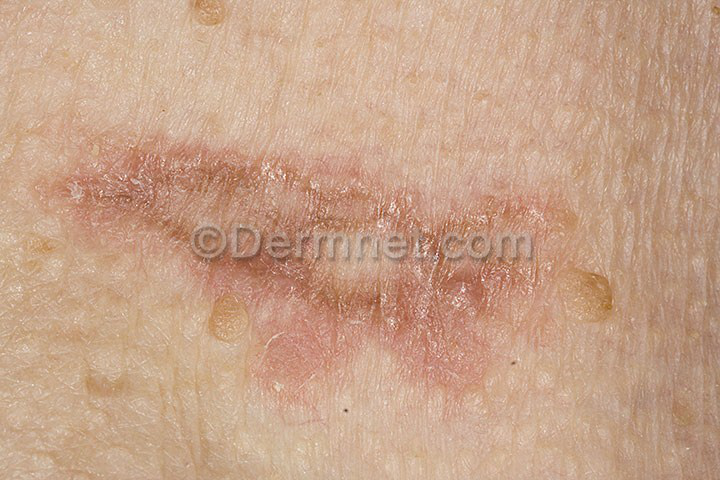

In [6]:
img

In [7]:
from torchvision import transforms
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim

In [8]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


In [9]:
from torchvision import datasets
from torch.utils.data import DataLoader

In [10]:
train_dir = "C:\\Users\\hp\\OneDrive\\5th semester\\archive (16)\\train"
test_dir = "C:\\Users\\hp\\OneDrive\\5th semester\\archive (16)\\test"

In [11]:
image_datasets = {
    'train': datasets.ImageFolder(train_dir, data_transforms['train']),
    'test': datasets.ImageFolder(test_dir, data_transforms['test'])
}

In [12]:
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=32, shuffle=True, num_workers=4),
    'test': DataLoader(image_datasets['test'], batch_size=32, shuffle=False, num_workers=4)
}

In [13]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}

In [14]:
class_names = image_datasets['train'].classes

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [16]:
print(f"Classes: {class_names}")
print(f"Dataset sizes: {dataset_sizes}")

Classes: ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']
Dataset sizes: {'train': 15557, 'test': 4002}


In [17]:
model = models.resnet18(pretrained=True)

In [18]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))

In [19]:
model = model.to(device)

In [20]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [21]:
criterion = nn.CrossEntropyLoss()

In [22]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [23]:
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=64, shuffle=True, num_workers=4),
    'test': DataLoader(image_datasets['test'], batch_size=64, shuffle=False, num_workers=4)
}

In [24]:
def train_model(model, criterion, optimizer, num_epochs=25):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()  
            else:
                model.eval()   

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    return model

model = train_model(model, criterion, optimizer, num_epochs=25)

Epoch 0/24
----------
train Loss: 2.6717 Acc: 0.2213
test Loss: 2.3461 Acc: 0.3148
Epoch 1/24
----------
train Loss: 2.2910 Acc: 0.3238
test Loss: 2.1152 Acc: 0.3763
Epoch 2/24
----------
train Loss: 2.1167 Acc: 0.3732
test Loss: 1.9936 Acc: 0.4060
Epoch 3/24
----------
train Loss: 2.0080 Acc: 0.3991
test Loss: 1.9029 Acc: 0.4330
Epoch 4/24
----------
train Loss: 1.9084 Acc: 0.4319
test Loss: 1.8425 Acc: 0.4550
Epoch 5/24
----------
train Loss: 1.8386 Acc: 0.4508
test Loss: 1.7816 Acc: 0.4643
Epoch 6/24
----------
train Loss: 1.7516 Acc: 0.4749
test Loss: 1.7221 Acc: 0.4845
Epoch 7/24
----------
train Loss: 1.6753 Acc: 0.4932
test Loss: 1.6771 Acc: 0.5005
Epoch 8/24
----------
train Loss: 1.6131 Acc: 0.5111
test Loss: 1.6431 Acc: 0.5070
Epoch 9/24
----------
train Loss: 1.5704 Acc: 0.5235
test Loss: 1.6194 Acc: 0.5110
Epoch 10/24
----------
train Loss: 1.5032 Acc: 0.5425
test Loss: 1.5898 Acc: 0.5295
Epoch 11/24
----------
train Loss: 1.4614 Acc: 0.5607
test Loss: 1.5625 Acc: 0.5302
Ep

In [25]:
torch.save(model.state_dict(), 'resnet18_trained.pth')

In [26]:
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))
model.load_state_dict(torch.load('resnet18_trained.pth'))
model = model.to(device)

In [28]:
def evaluate_model(model, criterion):
    model.eval()   

    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in dataloaders['test']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / dataset_sizes['test']
    epoch_acc = running_corrects.double() / dataset_sizes['test']

    print(f'Test Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

evaluate_model(model, criterion)


Test Loss: 1.4090 Acc: 0.6059


In [30]:
import matplotlib.pyplot as plt

Predicted class: Eczema Photos


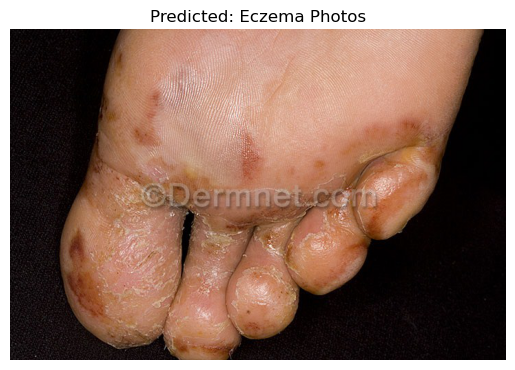

In [31]:
def predict_image(image_path, model, class_names):
    image = Image.open(image_path)
    image = data_transforms['test'](image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)

    return class_names[preds[0]]

def show_image(image_path, predicted_class):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

test_image_path = "C:\\Users\\hp\\OneDrive\\5th semester\\archive (16)\\test\\Eczema Photos\\Dyshidrosis-2.jpg"  
predicted_class = predict_image(test_image_path, model, class_names)
print(f'Predicted class: {predicted_class}')
show_image(test_image_path, predicted_class)
